In [35]:
# === 1️⃣ CONFIGURACIÓN Y CARGA DE DATOS ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import datetime, time

# Activar TensorBoard
%load_ext tensorboard

print(f"Versión de TensorFlow: {tf.__version__}")

# Cargar dataset Fashion MNIST
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalización de píxeles (0–255 → 0–1)
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Crear conjuntos de validación y entrenamiento reducido
x_val = x_train_full[50000:]
y_val = y_train_full[50000:]
x_train = x_train_full[:10000]
y_train = y_train_full[:10000]

print(f"\nImágenes de entrenamiento: {x_train.shape[0]}")
print(f"Imágenes de validación: {x_val.shape[0]}")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Versión de TensorFlow: 2.20.0

Imágenes de entrenamiento: 10000
Imágenes de validación: 10000

Imágenes de entrenamiento: 10000
Imágenes de validación: 10000


In [36]:
# === 2️⃣ MODELO DEFECTUOSO (SIN REGULARIZACIÓN) ===
def crear_modelo_defectuoso():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu', name="Capa_Oculta_1"),
        layers.Dense(512, activation='relu', name="Capa_Oculta_2"),
        layers.Dense(10, activation='softmax', name="Capa_Salida")
    ], name="Modelo_Defectuoso")

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Entrenamiento del modelo defectuoso
log_dir_defectuoso = "logs/fit/defectuoso_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_defectuoso = keras.callbacks.TensorBoard(log_dir=log_dir_defectuoso, histogram_freq=1)

print("\n--- ENTRENANDO MODELO DEFECTUOSO ---")
model_defectuoso = crear_modelo_defectuoso()
history_defectuoso = model_defectuoso.fit(
    x_train, y_train,
    epochs=40,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_defectuoso],
    verbose=2
)


--- ENTRENANDO MODELO DEFECTUOSO ---
Epoch 1/40
Epoch 1/40
313/313 - 4s - 14ms/step - accuracy: 0.7667 - loss: 0.6503 - val_accuracy: 0.8040 - val_loss: 0.5540
Epoch 2/40
313/313 - 4s - 14ms/step - accuracy: 0.7667 - loss: 0.6503 - val_accuracy: 0.8040 - val_loss: 0.5540
Epoch 2/40
313/313 - 3s - 10ms/step - accuracy: 0.8323 - loss: 0.4570 - val_accuracy: 0.8393 - val_loss: 0.4549
Epoch 3/40
313/313 - 3s - 10ms/step - accuracy: 0.8323 - loss: 0.4570 - val_accuracy: 0.8393 - val_loss: 0.4549
Epoch 3/40
313/313 - 3s - 10ms/step - accuracy: 0.8516 - loss: 0.3906 - val_accuracy: 0.8461 - val_loss: 0.4426
Epoch 4/40
313/313 - 3s - 10ms/step - accuracy: 0.8516 - loss: 0.3906 - val_accuracy: 0.8461 - val_loss: 0.4426
Epoch 4/40
313/313 - 3s - 9ms/step - accuracy: 0.8669 - loss: 0.3530 - val_accuracy: 0.8438 - val_loss: 0.4289
Epoch 5/40
313/313 - 3s - 9ms/step - accuracy: 0.8669 - loss: 0.3530 - val_accuracy: 0.8438 - val_loss: 0.4289
Epoch 5/40
313/313 - 3s - 10ms/step - accuracy: 0.8767 - 

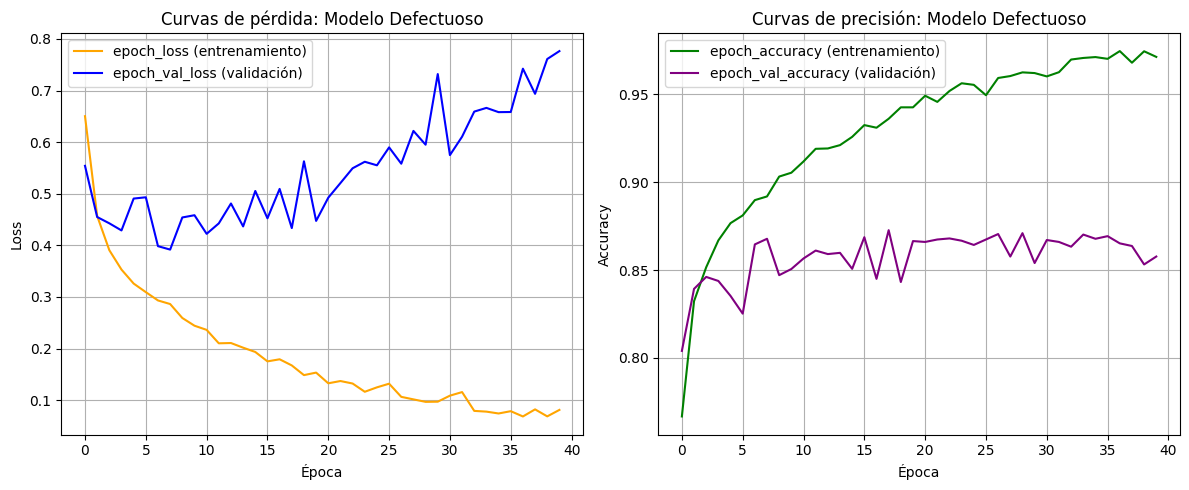

In [37]:
# Gráficas de pérdida y precisión del modelo defectuoso 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_defectuoso.history['loss'], label='epoch_loss (entrenamiento)', color='orange')
plt.plot(history_defectuoso.history['val_loss'], label='epoch_val_loss (validación)', color='blue')
plt.title('Curvas de pérdida: Modelo Defectuoso')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_defectuoso.history['accuracy'], label='epoch_accuracy (entrenamiento)', color='green')
plt.plot(history_defectuoso.history['val_accuracy'], label='epoch_val_accuracy (validación)', color='purple')
plt.title('Curvas de precisión: Modelo Defectuoso')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [38]:
# === 3️⃣ MODELO ROBUSTO (CON REGULARIZACIÓN) ===
def crear_modelo_robusto():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),

        # Bloque oculto 1
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        # Bloque oculto 2
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        # Capa de salida
        layers.Dense(10, activation='softmax')
    ], name="Modelo_Robusto")

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Entrenamiento del modelo robusto
log_dir_robusto = "logs/fit/robusto_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_robusto = keras.callbacks.TensorBoard(log_dir=log_dir_robusto, histogram_freq=1)

print("\n--- ENTRENANDO MODELO ROBUSTO ---")
model_robusto = crear_modelo_robusto()
history_robusto = model_robusto.fit(
    x_train, y_train,
    epochs=40,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_robusto],
    verbose=2
)


--- ENTRENANDO MODELO ROBUSTO ---
Epoch 1/40
313/313 - 5s - 16ms/step - accuracy: 0.7344 - loss: 0.7548 - val_accuracy: 0.7973 - val_loss: 0.5877
Epoch 2/40
313/313 - 5s - 16ms/step - accuracy: 0.7344 - loss: 0.7548 - val_accuracy: 0.7973 - val_loss: 0.5877
Epoch 2/40
313/313 - 3s - 10ms/step - accuracy: 0.8029 - loss: 0.5491 - val_accuracy: 0.8262 - val_loss: 0.4848
Epoch 3/40
313/313 - 3s - 10ms/step - accuracy: 0.8029 - loss: 0.5491 - val_accuracy: 0.8262 - val_loss: 0.4848
Epoch 3/40
313/313 - 3s - 10ms/step - accuracy: 0.8183 - loss: 0.5018 - val_accuracy: 0.8448 - val_loss: 0.4292
Epoch 4/40
313/313 - 3s - 10ms/step - accuracy: 0.8183 - loss: 0.5018 - val_accuracy: 0.8448 - val_loss: 0.4292
Epoch 4/40
313/313 - 3s - 10ms/step - accuracy: 0.8380 - loss: 0.4526 - val_accuracy: 0.8520 - val_loss: 0.4134
Epoch 5/40
313/313 - 3s - 10ms/step - accuracy: 0.8380 - loss: 0.4526 - val_accuracy: 0.8520 - val_loss: 0.4134
Epoch 5/40
313/313 - 3s - 10ms/step - accuracy: 0.8454 - loss: 0.4222

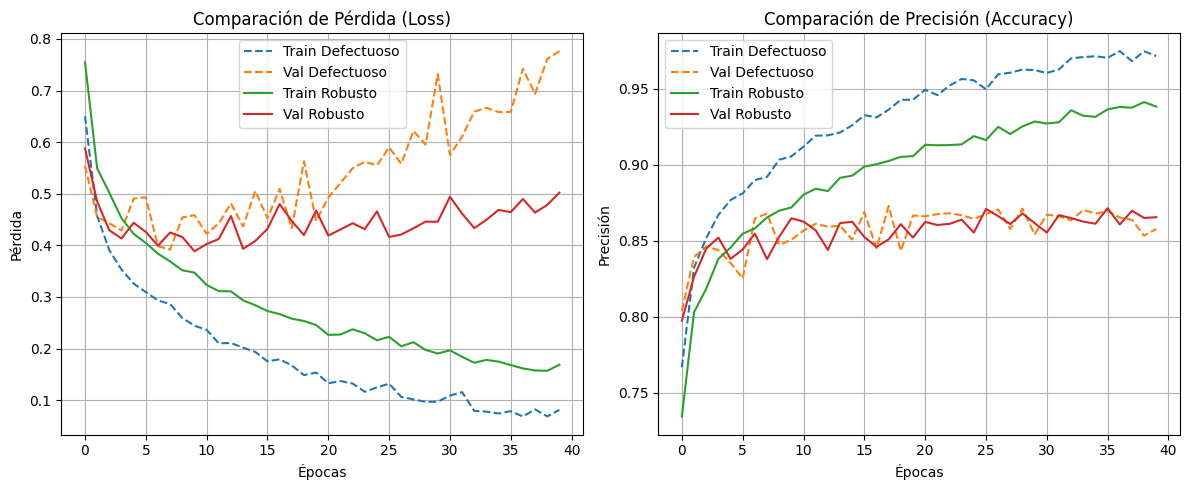

In [39]:
# === 4️⃣ GRAFICAR RESULTADOS (matplotlib) ===
plt.figure(figsize=(12,5))

# Pérdida (Loss)
plt.subplot(1,2,1)
plt.plot(history_defectuoso.history['loss'], label='Train Defectuoso', linestyle='--')
plt.plot(history_defectuoso.history['val_loss'], label='Val Defectuoso', linestyle='--')
plt.plot(history_robusto.history['loss'], label='Train Robusto')
plt.plot(history_robusto.history['val_loss'], label='Val Robusto')
plt.title("Comparación de Pérdida (Loss)")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)

# Precisión (Accuracy)
plt.subplot(1,2,2)
plt.plot(history_defectuoso.history['accuracy'], label='Train Defectuoso', linestyle='--')
plt.plot(history_defectuoso.history['val_accuracy'], label='Val Defectuoso', linestyle='--')
plt.plot(history_robusto.history['accuracy'], label='Train Robusto')
plt.plot(history_robusto.history['val_accuracy'], label='Val Robusto')
plt.title("Comparación de Precisión (Accuracy)")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
# Mostrar arquitectura de los modelos de forma dinámica
print("Modelo Defectuoso:")
model_defectuoso.summary()

print("\nModelo Robusto:")
model_robusto.summary()

Modelo Defectuoso:


Modelo Defectuoso:


Model: "Modelo_Defectuoso"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_1 (Dense)           │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

Modelo Defectuoso:


Model: "Modelo_Defectuoso"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_1 (Dense)           │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,009,120 (7.66 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)


Modelo Robusto:


Model: "Modelo_Robusto"

Modelo Defectuoso:


Model: "Modelo_Defectuoso"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_1 (Dense)           │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,009,120 (7.66 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)


Modelo Robusto:


Model: "Modelo_Robusto"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,017,312 (7.70 MB)

 Trainable params: 671,754 (2.56 MB)

 Non-trainable params: 2,048 (8.00 KB)

 Optimizer params: 1,343,510 (5.13 MB)

In [41]:
# === 5️⃣ VISUALIZACIÓN PROFESIONAL CON TENSORBOARD ===
print("\nPara abrir TensorBoard y comparar las curvas en tiempo real, ejecuta:")
print("%tensorboard --logdir logs/fit")


Para abrir TensorBoard y comparar las curvas en tiempo real, ejecuta:
%tensorboard --logdir logs/fit


In [42]:
# Comparación dinámica de epoch_val_accuracy entre modelos
def mostrar_comparacion_val_acc(history_defectuoso, history_robusto, epochs=[10, 20, 40]):
    print("| Época | Defectuoso (val_acc) | Robusto (val_acc) | Ganador |")
    print("|-------|---------------------|-------------------|---------|")
    for ep in epochs:
        d_acc = history_defectuoso.history['val_accuracy'][ep-1]
        r_acc = history_robusto.history['val_accuracy'][ep-1]
        ganador = "Robusto" if r_acc > d_acc else "Defectuoso"
        extra = " (+{:.0f}%)".format((r_acc-d_acc)*100) if ep==40 else ""
        print(f"| {ep:<5} | {d_acc:.2f}               | {r_acc:.2f}              | {ganador}{extra} |")

mostrar_comparacion_val_acc(history_defectuoso, history_robusto)

# Comparación dinámica de precisión final y brecha
def mostrar_comparacion_final(history_defectuoso, history_robusto):
    d_train = history_defectuoso.history['accuracy'][-1]
    d_val = history_defectuoso.history['val_accuracy'][-1]
    r_train = history_robusto.history['accuracy'][-1]
    r_val = history_robusto.history['val_accuracy'][-1]
    brecha_d = abs(d_train - d_val)*100
    brecha_r = abs(r_train - r_val)*100
    print("\n")
    print("\n")
    print("| Modelo      | epoch_accuracy final | epoch_val_accuracy final | Brecha |")
    print("|------------|---------------------|-------------------------|--------|")
    print(f"| Defectuoso | {d_train:.2f}                | {d_val:.2f}                    | {brecha_d:.0f}%    |")
    print(f"| Robusto    | {r_train:.2f}                | {r_val:.2f}                    | {brecha_r:.0f}%     |")

mostrar_comparacion_final(history_defectuoso, history_robusto)

| Época | Defectuoso (val_acc) | Robusto (val_acc) | Ganador |
|-------|---------------------|-------------------|---------|
| 10    | 0.85               | 0.86              | Robusto |
| 20    | 0.87               | 0.85              | Defectuoso |
| 40    | 0.86               | 0.87              | Robusto (+1%) |




| Modelo      | epoch_accuracy final | epoch_val_accuracy final | Brecha |
|------------|---------------------|-------------------------|--------|
| Defectuoso | 0.97                | 0.86                    | 11%    |
| Robusto    | 0.94                | 0.87                    | 7%     |
